In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X  + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train,train_labels=y_train,
                     test_data=X_test,test_labels=y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training')
  plt.scatter(test_data,test_labels,c='r',s=4,label='Testing')
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')

  plt.legend(prop={'size':14})

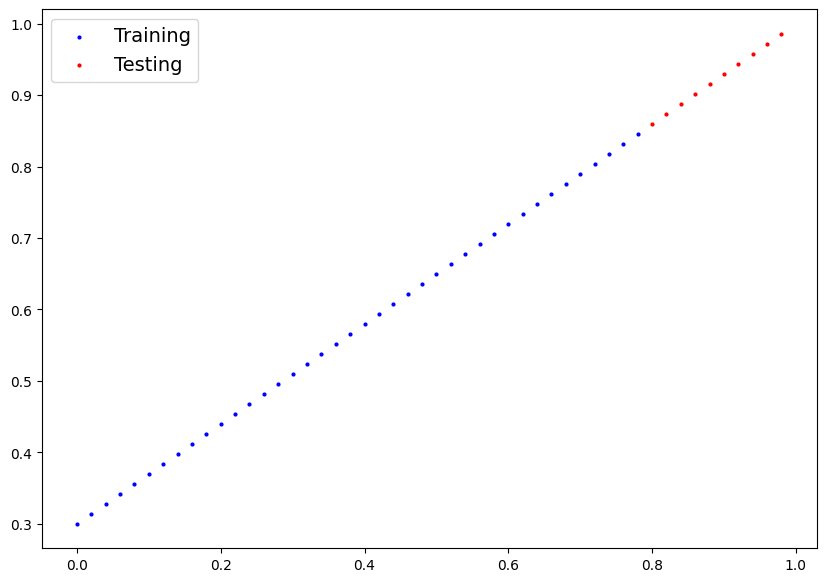

In [5]:
plot_predictions();

In [6]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float32),
                                requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float32),
                             requires_grad=True)

  def forward(self,x):
    return self.weights * x + self.bias

In [7]:
torch.manual_seed(42)
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
with torch.inference_mode():
  y_preds = model_0(X_test)


In [10]:
print(len(X_test))
print(len(y_preds))
print(y_preds)
print(y_test)

10
10
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


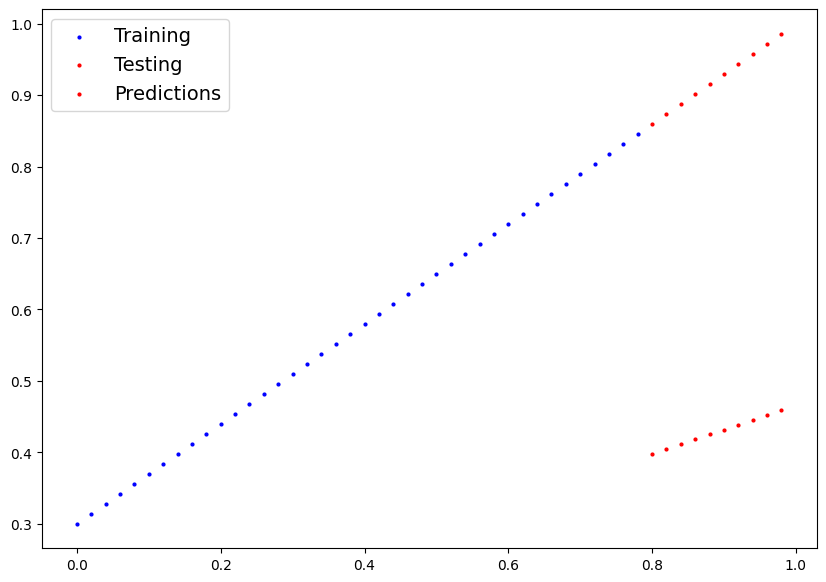

In [11]:
plot_predictions(predictions = y_preds)

In [12]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [13]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [14]:
torch.manual_seed(42)
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
  model_0.train()
  optimizer.zero_grad()
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds,y_train)
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test.type(torch.float))
    if epoch % 10 ==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


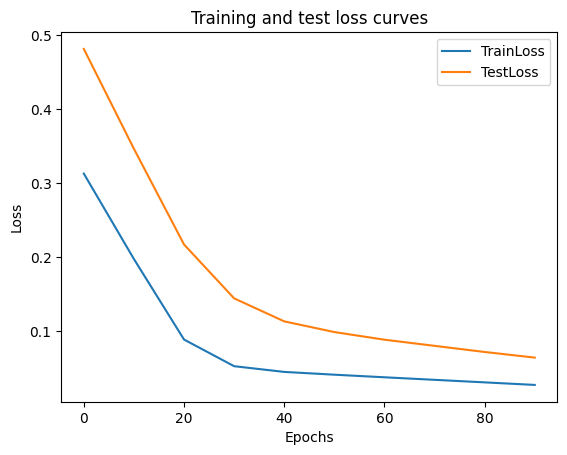

In [15]:
plt.plot(epoch_count,train_loss_values,label='TrainLoss')
plt.plot(epoch_count,test_loss_values,label='TestLoss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [16]:
print(model_0.state_dict())
print(f"Weight: {weight}, Bias: {bias} ")

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
Weight: 0.7, Bias: 0.3 


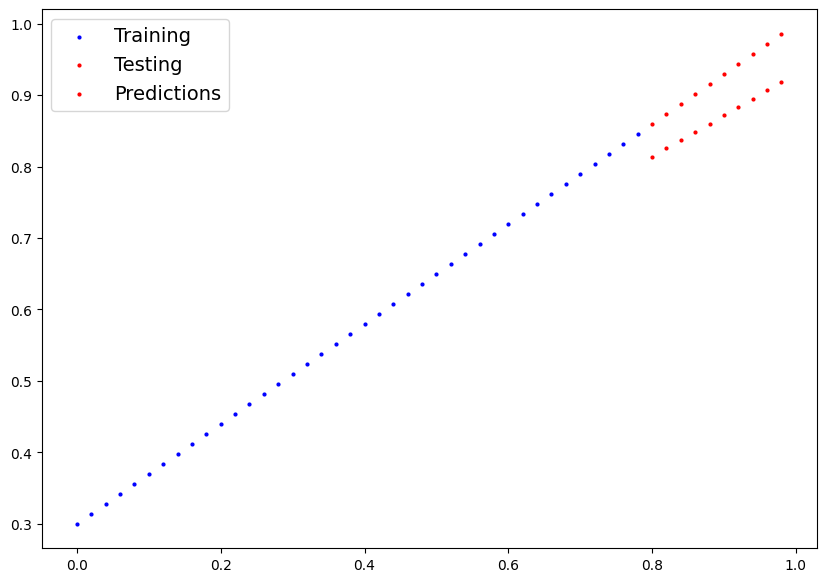

In [17]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions = y_preds)

In [18]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f'Saving the model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),f = MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_0.pth


In [19]:
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Apr 20 17:00 models/01_pytorch_workflow_model_0.pth


In [20]:
loaded_model_0 = LinearRegression()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [21]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [22]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])